<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


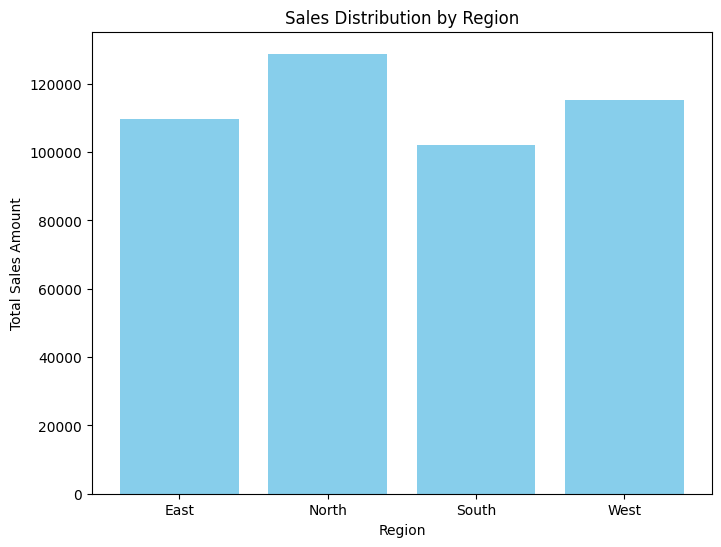

  Region  Total Amount
1  North        128830
3   West        115355
0   East        109705
2  South        102110


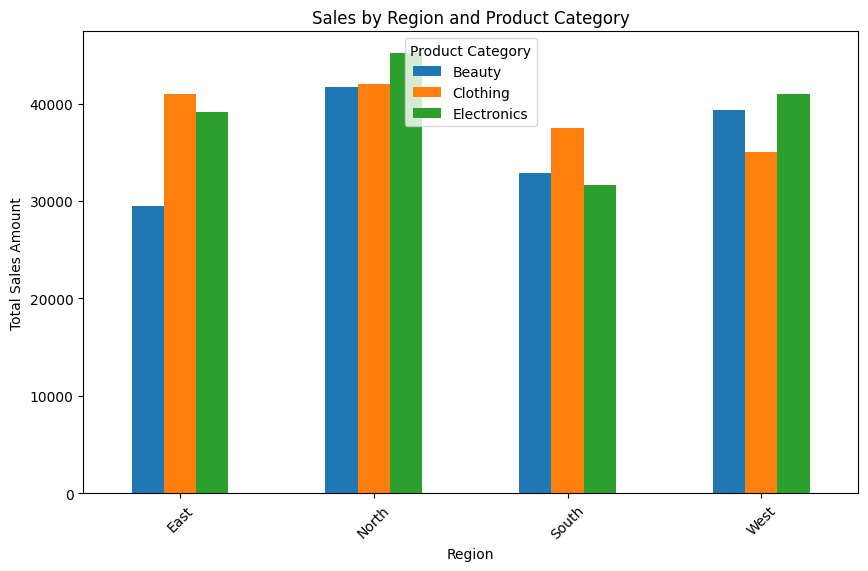

In [5]:
# Import the necessary libraries
import pandas as pd  # pandas is used for data manipulation and analysis
import matplotlib.pyplot as plt  # matplotlib is used for creating visualizations
import numpy as np  # numpy is used for numerical operations like random choices

# Step 1: Import the "Retail_Sales_Data.csv" dataset
df = pd.read_csv("retail_sales_dataset.csv")  # Reads the CSV file into a pandas DataFrame

# Step 2: Explore the dataset to understand its structure and content
# print(df.head())  # Show the first 5 rows of the dataset to get a sense of the data
print(df.info())  # Get information about the dataset like column names, data types, and missing values
print(df.isnull().sum())  # Check for missing values in the dataset

# Step 3: Identify the relevant variables for aggregating sales data
# We'll focus on 'Region', 'Product Category', and 'Total Amount'
# For this example, we'll add a dummy 'Region' column, as the dataset doesn't include one
regions = ['North', 'South', 'East', 'West']  # List of possible regions
df['Region'] = np.random.choice(regions, size=len(df))  # Assign random regions to each row in the dataset
df_relevant = df[['Customer ID', 'Product Category', 'Total Amount', 'Region']]  # Extract relevant columns

# Step 4: Group the sales data by region and calculate the total sales amount for each region
sales_by_region = df.groupby('Region')['Total Amount'].sum().reset_index()  # Grouping by region and summing sales amounts
 
# Step 5: Create bar plots to visualize the sales distribution by region
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(sales_by_region['Region'], sales_by_region['Total Amount'], color='skyblue')  # Create a bar plot
plt.title('Sales Distribution by Region')  # Add title to the plot
plt.xlabel('Region')  # Label x-axis
plt.ylabel('Total Sales Amount')  # Label y-axis
plt.show()  # Display the plot

# Step 6: Identify the top-performing regions based on the highest sales amount
top_regions = sales_by_region.sort_values('Total Amount', ascending=False)  # Sort regions by sales amount
print(top_regions)  # Show the sorted top-performing regions

# Step 7: Group the sales data by region and product category to calculate the total sales amount for each combination
sales_by_region_category = df.groupby(['Region', 'Product Category'])['Total Amount'].sum().reset_index()  # Group by both region and category

# Step 8: Create a grouped bar plot to compare the sales amounts across different regions and product categories
sales_pivot = sales_by_region_category.pivot(index='Region', columns='Product Category', values='Total Amount')  # Pivot the data for plotting
sales_pivot.plot(kind='bar', stacked=False, figsize=(10, 6))  # Create a grouped bar plot
plt.title('Sales by Region and Product Category')  # Add title to the plot
plt.xlabel('Region')  # Label x-axis
plt.ylabel('Total Sales Amount')  # Label y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


In [3]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Region
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,West
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,North
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,East
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,West
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,West
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,South
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,West
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,South
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,North
